In [69]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA

# Contents
- [Iris dataset PCA features](#Iris-dataset-PCA-features)
- [Decision Tree on Iris PCA features](#Decision-Tree-on-Iris-PCA-features)
- [Baseline](#Baseline)
- [PCA and Kernel PCA (KPCA) Features](#PCA-and-Kernel-PCA-(KPCA)-Features)
- [Performance baseline vs baseline with PCA features](#Performance-baseline-vs-baseline-with-PCA-features)
- [Performance baseline vs baseline with Kernel PCA features](#Performance-baseline-vs-baseline-with-Kernel-PCA-features)
- [Plot PCA Features against target](#Plot-PCA-Features-against-target)
- [Plot Kernel PCA Features against target](#Plot-Kernel-PCA-Features-against-target)



# Iris dataset PCA features

taken from [sklearn docu](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html):


Text(0.5, 1.0, 'PCA of IRIS dataset')

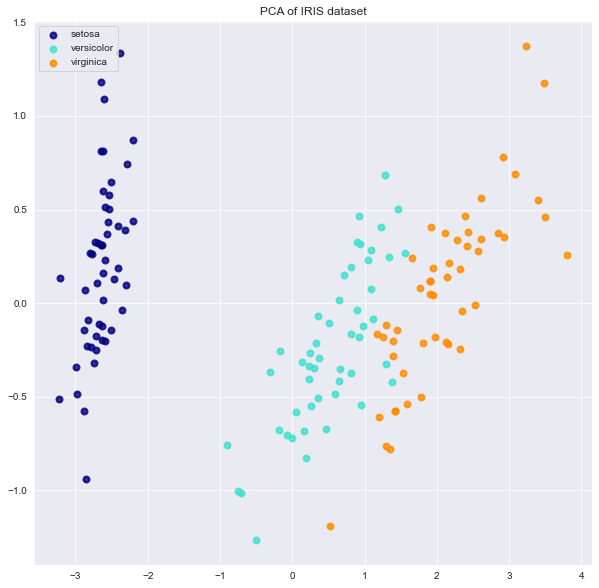

In [70]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.figure(figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

## Decision Tree on Iris PCA features

[]

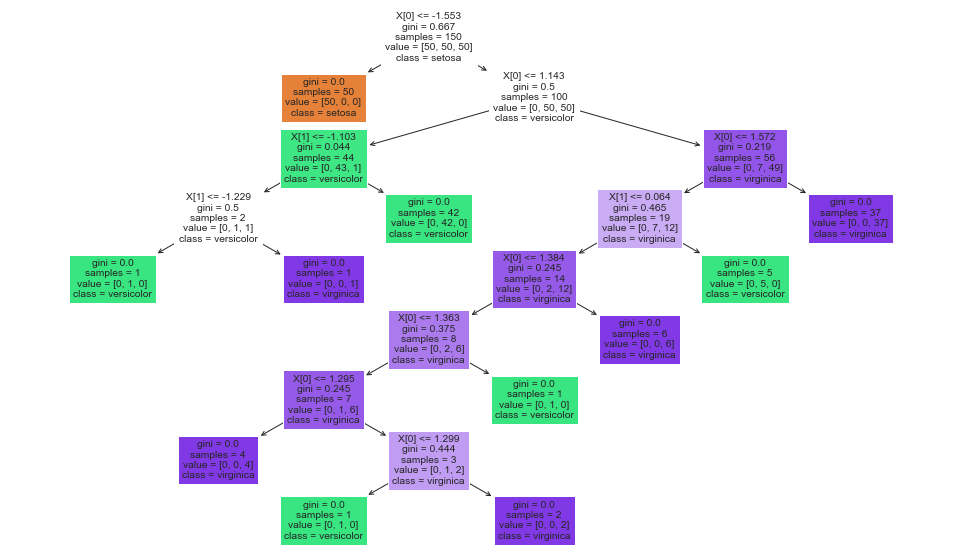

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier().fit(X_r, y)
plt.figure(figsize=(17, 10))

plot = tree.plot_tree(dt, filled=True, class_names=target_names)
plt.plot()


# Baseline

Baseline means a hyperparameter tuned random forest on a cleaned dataset.

Hyperparameter grid used with 5 times cross validation:

```python
{
    "max_depth": [6, None],
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "n_jobs": [-1],
    "class_weight": ["balanced", None],
    "random_state": [1, 42, 1337]
}
```

All datasets are preprocessed with the following steps:
- impute NaN values (numerical data with mean value, categorical data with "missing")
- one hot encode
- standard scale
- label encode
- shuffle data
- hybrid feature selection to select the best up to 100 features (boruta, select from model and Recursive feature elimination with cross-validation)

# PCA and Kernel PCA (KPCA) Features

Both feature types are generated on all features before feature selection. For PCA and KPCA n_components is set to 2.
[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) uses the default settings of sklearn. [KPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) uses the "rbf" kernel and the "randomized" eigen_solver

# Performance baseline vs baseline with PCA features


In [72]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="pca_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "pca_clean_test_score", "pca_clean_test_score_change_to_baseline"]
df[select_columns]


,dataset_id,baseline_test_score,pca_clean_test_score,pca_clean_test_score_change_to_baseline
0,469,0.217712,0.180812,-16.949153
1,40975,0.959184,0.926871,-3.368794
2,37,0.740458,0.717557,-3.092784
3,22,0.791176,0.767647,-2.973978
4,23381,0.605882,0.588235,-2.912621
5,54,0.763889,0.743056,-2.727273
6,6332,0.739130,0.722826,-2.205882
7,29,0.880851,0.868085,-1.449275
8,1464,0.827451,0.815686,-1.421801
9,40966,0.991848,0.978261,-1.369863


In [73]:
n_improved_datasets = sum(df["pca_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)


In [74]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

The accuracy was improved in 36 of 72 datasets (50.0%)


<AxesSubplot:ylabel='dataset_id'>

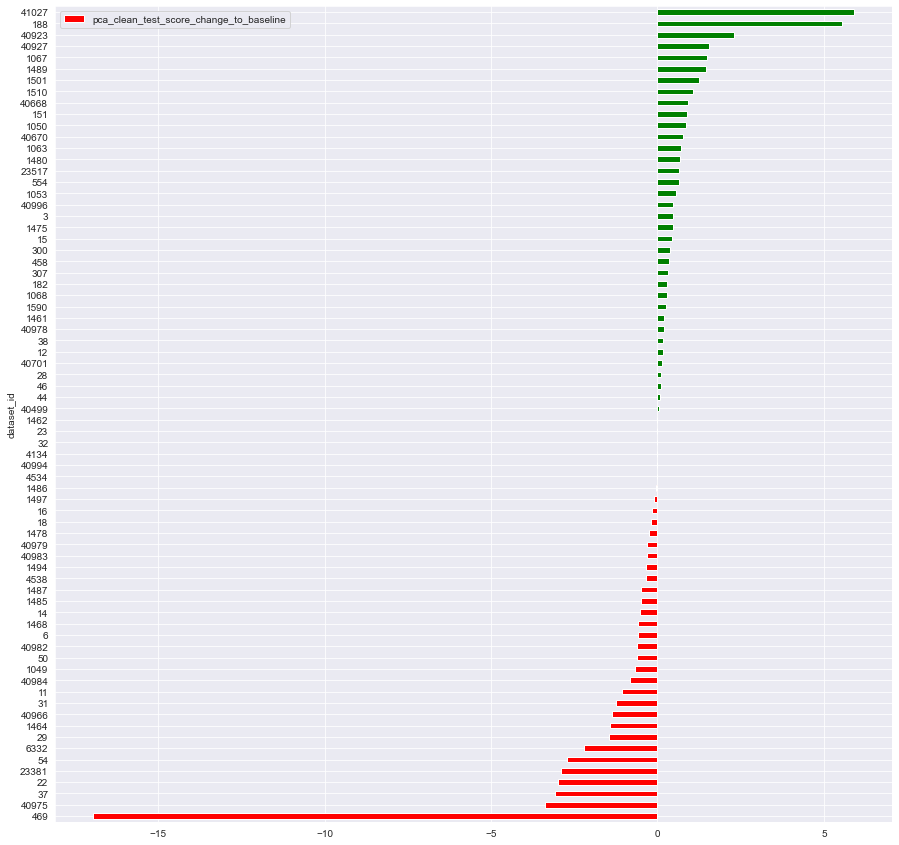

In [75]:
df.plot.\
    barh(
        x="dataset_id",
        y="pca_clean_test_score_change_to_baseline",
        color=(df["pca_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )


# Performance baseline vs baseline with Kernel PCA features


In [76]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="kpca_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "kpca_clean_test_score", "kpca_clean_test_score_change_to_baseline"]
df[select_columns]

,dataset_id,baseline_test_score,kpca_clean_test_score,kpca_clean_test_score_change_to_baseline
0,469,0.217712,0.173432,-20.338983
1,23381,0.605882,0.547059,-9.708738
2,54,0.763889,0.729167,-4.545455
3,1480,0.733668,0.703518,-4.109589
4,11,0.873239,0.854460,-2.150538
5,40975,0.959184,0.938776,-2.127660
6,23,0.538922,0.528942,-1.851852
7,40966,0.991848,0.980978,-1.095890
8,50,0.993865,0.984663,-0.925926
9,40984,0.933842,0.926209,-0.817439


In [77]:
n_improved_datasets = sum(df["kpca_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)

In [78]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

The accuracy was improved in 36 of 72 datasets (50.0%)


<AxesSubplot:ylabel='dataset_id'>

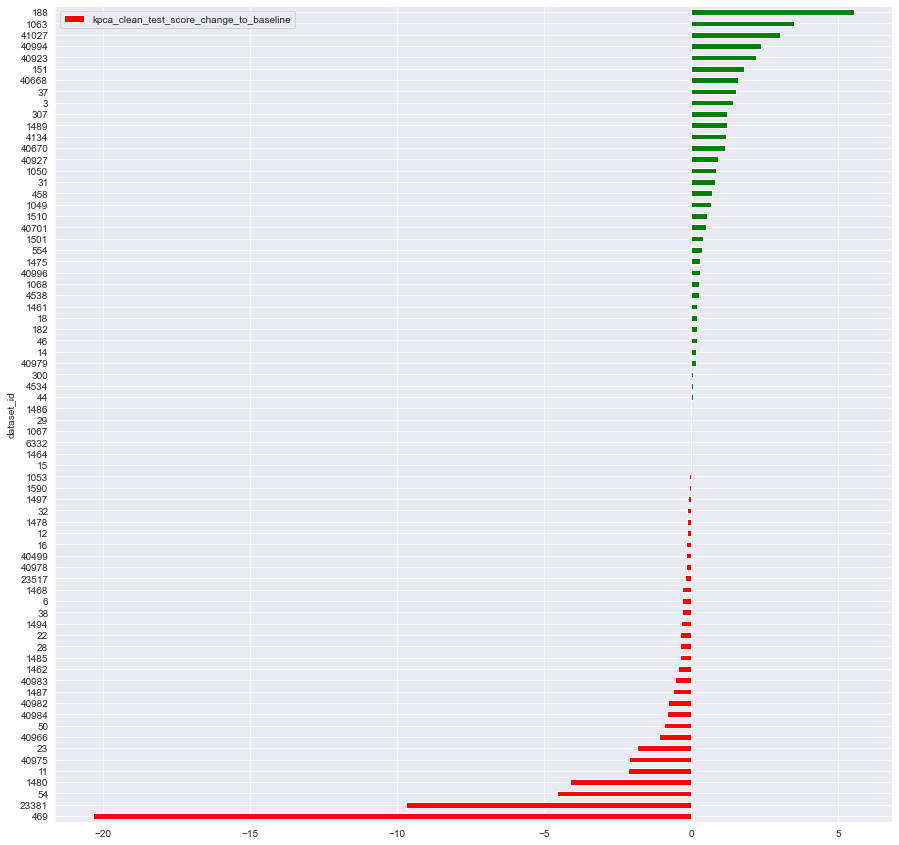

In [79]:
df.plot.\
    barh(
        x="dataset_id",
        y="kpca_clean_test_score_change_to_baseline",
        color=(df["kpca_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )

## set a dataset you want to use

In [80]:
#dataset_id = "40978"  # 2 classes, ~3k features
#dataset_id = "3"  # 2 classes, 73 features
#dataset_id = "1486"  # 2 classes, 174 features
dataset_id = "41027"  # 3 classes, 6 features


n_head = 1000000000

# Plot PCA Features against target


X shape: (44819, 6)
target classes: 
2    23062
0    17422
1     4335
Name: y, dtype: int64


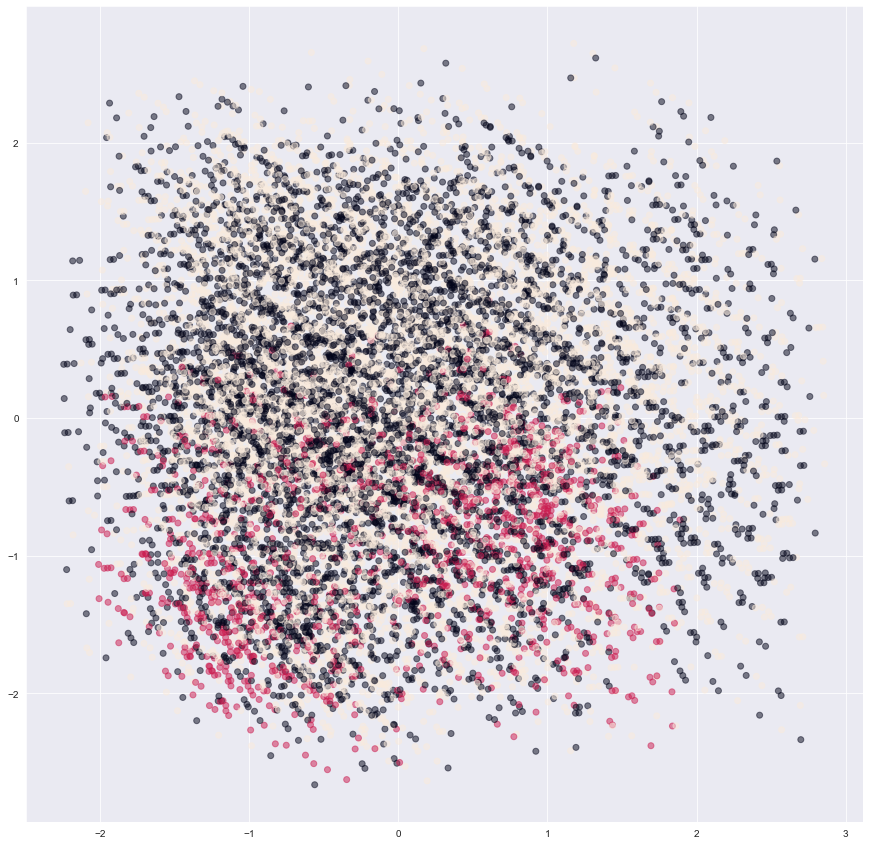

In [81]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_PCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["pca_0"].head(n_head)
plot_y = df_pca_test["pca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c, alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-2, 2])
# plt.ylim([-5, 5])




# Plot Kernel PCA Features against target

X shape: (44819, 6)
target classes: 
2    23062
0    17422
1     4335
Name: y, dtype: int64


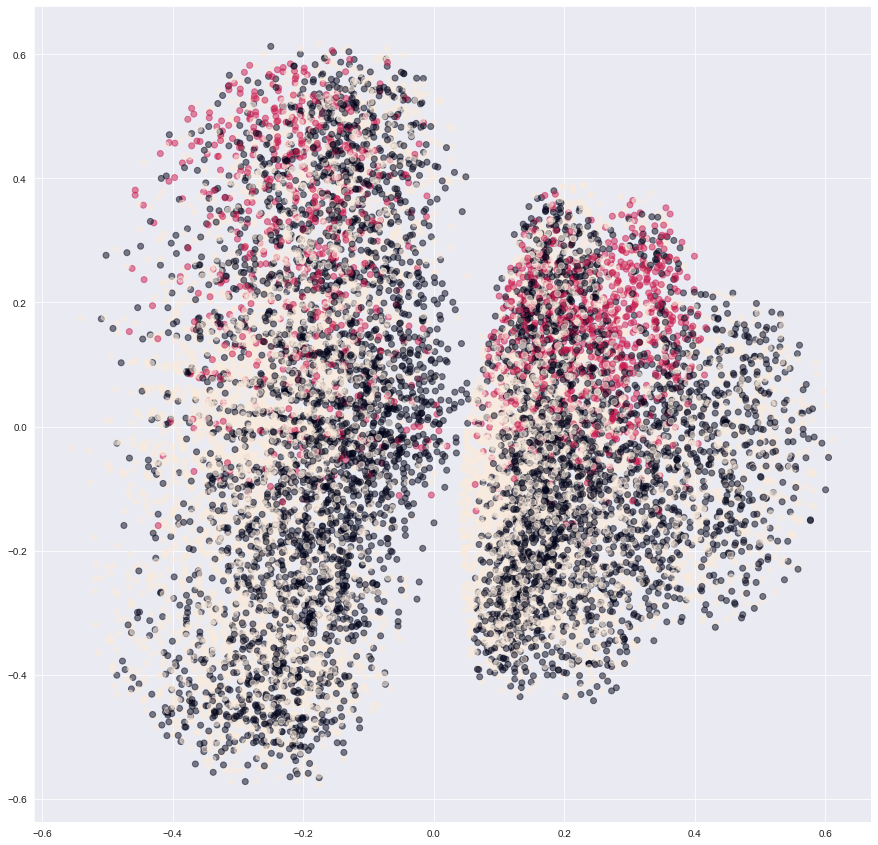

In [82]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_KPCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["kpca_0"].head(n_head)
plot_y = df_pca_test["kpca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c, alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])


